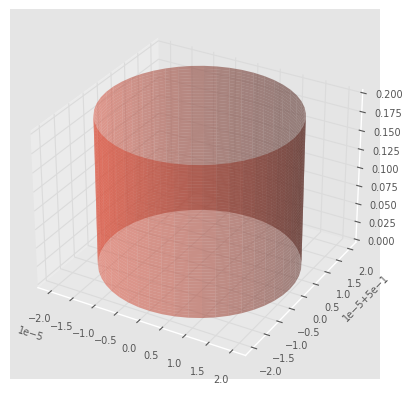

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import checking

obstacle1 = np.array([0, 0.5, 0.00002, 0.2])
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Xc,Yc,Zc = data_for_cylinder_along_z(*obstacle1)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from roboticstoolbox import DHRobot, RevoluteDH
import numpy.linalg as linalg

# Define the robot's kinematic structure
L1 = RevoluteDH(d=202, a=0, offset=0, alpha=np.pi/2, m=0, r=[0, 0, 0])
L2 = RevoluteDH(d=0, a=160, offset=0, alpha=0, m=1, r=[0, 0, 101])
L3 = RevoluteDH(d=0, a=0, offset=np.pi/2, alpha=np.pi/2, m=1, r=[0, 0, 80])
L4 = RevoluteDH(d=195, a=0, offset=0, alpha=-np.pi/2, m=1, r=[0, 0, 40])
L5 = RevoluteDH(d=0, a=0, offset=0, alpha=np.pi/2, m=1, r=[0, 0, 140])
L6 = RevoluteDH(d=67.15, a=0, offset=0, alpha=0, m=1, r=[0, 0, 35])

robot = DHRobot([L1, L2, L3, L4, L5, L6])

deg =  sympy.S.Pi / 180
qr = np.array([0, 0, 0, 0, 0, 0]) * deg
qz = np.zeros(6)
robot.addconfiguration("qr", qr)
robot.addconfiguration("qz", qz)
print(robot)


DHRobot: noname, 6 joints (RRRRRR), dynamics, standard DH parameters
┌──────────┬───────┬─────┬────────┐
│   θⱼ     │  dⱼ   │ aⱼ  │   ⍺ⱼ   │
├──────────┼───────┼─────┼────────┤
│ q1       │   202 │   0 │  90.0° │
│ q2       │     0 │ 160 │   0.0° │
│ q3 + 90° │     0 │   0 │  90.0° │
│ q4       │   195 │   0 │ -90.0° │
│ q5       │     0 │   0 │  90.0° │
│ q6       │ 67.15 │   0 │   0.0° │
└──────────┴───────┴─────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│name │ q0  │ q1  │ q2  │ q3  │ q4  │ q5  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  qr │ 0°  │ 0°  │ 0°  │ 0°  │ 0°  │ 0°  │
│  qz │  0° │  0° │  0° │  0° │  0° │  0° │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘



In [36]:
robot.revolutejoints

[True, True, True, True, True, True]

In [37]:
print("Homogenous transformation matrix:\n")
np.array(robot.fkine(qr),dtype='float').round()

Homogenous transformation matrix:



array([[  0.,  -0.,   1., 422.],
       [  0.,  -1.,  -0.,  -0.],
       [  1.,   0.,  -0., 202.],
       [  0.,   0.,   0.,   1.]])

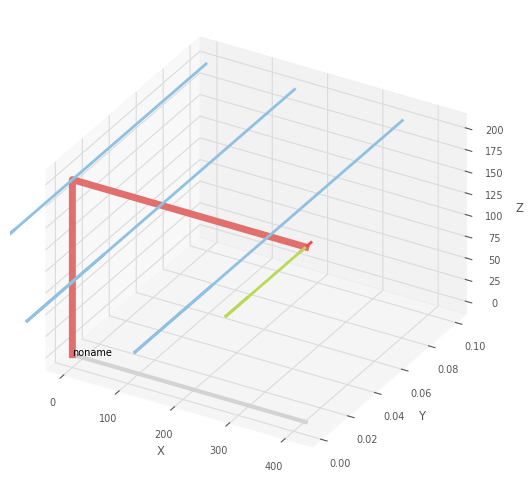

PyPlot3D backend, t = 0.05, scene:
  noname

<Figure size 640x480 with 0 Axes>

In [38]:
robot.plot(qr)

In [39]:
print("Jacobian with respect to end-effector frame:\n")
np.array(robot.jacob0(qr),dtype='float').round()

Jacobian with respect to end-effector frame:



array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [422.,   0.,   0.,   0.,   0.,   0.],
       [  0., 422., 262.,   0.,  67.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   1.],
       [  0.,  -1.,  -1.,  -0.,  -1.,  -0.],
       [  1.,   0.,   0.,  -0.,   0.,  -0.]])

In [53]:
print("Inertia matrix:")
np.array(robot.inertia(qr),dtype='float').round()

Inertia matrix:


array([[675037.,      0.,      0.,     -0.,      0.,      0.],
       [     0., 663236., 390092., -14200., 115998.,      0.],
       [     0., 390092., 244948.,  -7800.,  77254.,      0.],
       [    -0., -14200.,  -7800.,   1600.,      0.,      0.],
       [     0., 115998.,  77254.,      0.,  30035.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.]])

In [54]:
dq = [0.1,0.2,0.3,-0.4,0.5,0.6] #Velocoties
print("Coriolis matrix:")
np.array(robot.coriolis(qr, dq),dtype='float').round()

Coriolis matrix:


array([[     0.,  -9052.,  -4540., -62879.,  46399.,      0.],
       [     0.,      0.,      0.,     -0.,      0.,     -0.],
       [     0.,     -0.,     -0.,     -0.,      0.,     -0.],
       [    -0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,     -0.,      0.,     -0.,      0.,     -0.],
       [     0.,      0.,      0.,      0.,      0.,      0.]])

In [55]:
print("Grabity matrix:")
np.array(robot.gravload(qr),dtype='float').round()

Grabity matrix:


array([   -0., 16747.,  8899.,  -392.,  2375.,     0.])

In [60]:
dq = np.array([0.1,0.2,0.3,-0.4,0.5,0.6]) #Velocoties
tau = np.array([-0.1,-0.2,0.3,0.4,-0.5,0.6]) #Torques

#Matrices: 
M = robot.inertia(qr)
C = robot.coriolis(qr, dq)
G = robot.gravload(qr)

#The Robot Canonical Equation:
d2q = linalg.pinv(M)@(tau.T - G.T - C@dq.T)
d2q

array([-0.06692795, -0.06147234,  0.0621809 ,  0.00306486, -0.00163298,
        0.        ])